In [1]:
cd ..

/home/martin/langevin_ggm


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from ggm_estimation.format_results import compute_estimation_performance, plot_results, color_fader

np.set_printoptions(suppress=True)

plt.rcParams['figure.figsize'] = [6, 5]

plt.rc('font', size=11)          # controls default text sizes
# plt.rc('axes', titlesize=12)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize

mpl.rcParams['font.family'] = 'serif'
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

%load_ext autoreload
%autoreload 2

## Full estimation plots

Samples: 49


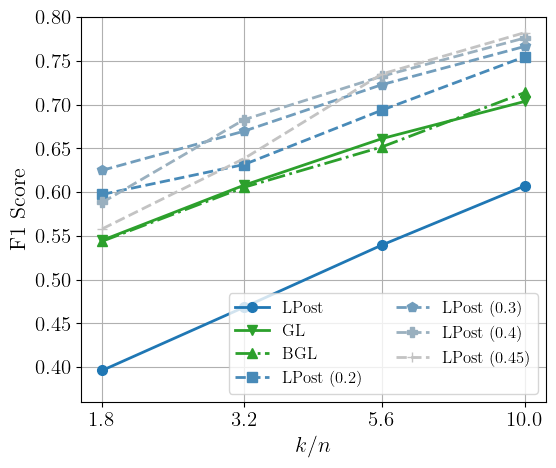

In [3]:
train_size = 0.5
threshold_grid = {
    "langevin_0.2": np.linspace(0.1, 0.9, 10),
    "langevin_0.3": np.linspace(0.1, 0.9, 10),
    "langevin_0.4": np.linspace(0.1, 0.9, 10),
    "langevin_0.45": np.linspace(0.1, 0.9, 10),
    "langevin_flat": np.linspace(0.1, 0.9, 10),
    "stability": np.linspace(0.1, 0.9, 10),
}
metric = "f1"
col_x_axis = "obs_ratio"

np.random.seed(0)
tuneable_methods = ["langevin_0.2", "langevin_0.3", "langevin_0.4", "langevin_0.45", "langevin_flat", "stability"]
fixed_methods = ["glasso"]
scores_egonets_full, _ = compute_estimation_performance("outputs/full_123456_deezer_10_[0.2, 0.3, 0.4, 0.45]_50.csv", 
                                                tuneable_methods, fixed_methods, train_size, 
                                                threshold_grid, metric, col_x_axis, n_splits=10,
                                                agg_fun="mean")

margins = [0.2, 0.3, 0.4, 0.45]

labels = {
    "langevin_flat": "LPost",
    "glasso": "GL",
    "stability": "BGL",
    "langevin_0.2": "LPost (0.2)",
    "langevin_0.3": "LPost (0.3)",
    "langevin_0.4": "LPost (0.4)",
    "langevin_0.45": "LPost (0.45)",
}

colors = {
    "langevin_flat": 'tab:blue',
    **{f"langevin_{margin}": color_fader('#1f77b4', '#c3c3c3', mix=(i+1)/(len(margins))) for i, margin in enumerate(margins)},
    "glasso": "tab:green",
    "stability": "tab:green",
}

linestyles = {
    "langevin_flat": '-',
    **{f"langevin_{margin}": '--' for margin in margins},
    "glasso": "-",
    "stability": "-."
}

plt.rc('legend', fontsize=12)    # legend fontsize
plot_results(scores_egonets_full, stds_grids=None,
             labels=labels, 
             ylabel="F1 Score", xlabel=r"$k / n$", logscale=True,
             colors=colors, linestyles=linestyles,
             ylims=(0.36, 0.80), 
             legend_ncol=2,
             output_file="outputs/plots/full_egonets.pdf", 
             marker_size=7, linewidth=2)

## Paper plots

Samples: 100


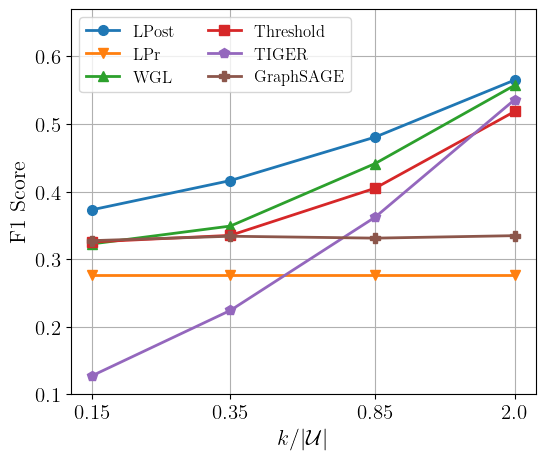

In [8]:
filename = "outputs/results_barabasi_0.1_True_0.2_10.csv"
tuneable_methods = ["langevin_posterior", "threshold", "gnn"]
fixed_methods = ["langevin_prior", "glasso", "tiger"]
train_size = 0.5
threshold_grid = {
    "langevin_posterior": np.linspace(0.45, 0.95, 5),
    "threshold": np.logspace(-1, 0, 5),
    "gnn": np.linspace(0.2, 0.8, 5),
}
metric = "f1"
col_x_axis = "obs_ratio"

np.random.seed(0)

scores_barabasi, _ = compute_estimation_performance(filename, tuneable_methods, fixed_methods, train_size, threshold_grid, metric, col_x_axis, n_splits=10)

labels = {
    "langevin_posterior": "LPost",
    "langevin_prior": "LPr",
    "glasso": "WGL",
    "threshold": "Threshold",
    "tiger": "TIGER",
    "gnn": "GraphSAGE",
}

plot_results(scores_barabasi, stds_grids=None, labels=labels, 
             ylabel="F1 Score", xlabel=r"$k / |\mathcal{U}|$", logscale=True,
             ylims=(0.1, 0.67), legend_ncol=2, legend_loc="upper left",
             output_file="outputs/plots/barabasi.pdf", marker_size=7, linewidth=2)

Samples: 100


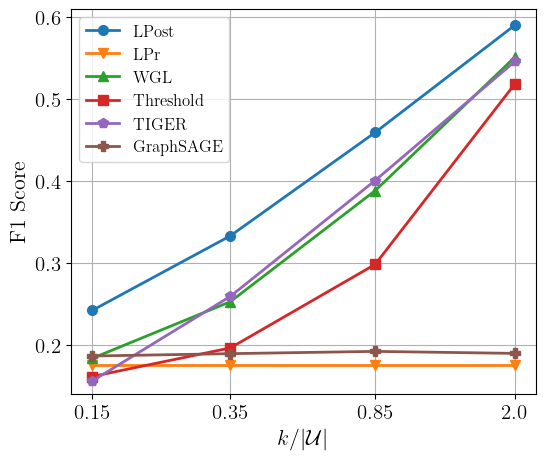

In [9]:
filename = "outputs/results_grids_0.2_True_None_10.csv"
tuneable_methods = ["langevin_posterior", "threshold", "gnn"]
fixed_methods = ["langevin_prior", "glasso", "tiger"]
train_size = 0.5
threshold_grid = {
    "langevin_posterior": np.linspace(0.45, 0.95, 5),
    "threshold": np.logspace(-1, 0, 5),
    "gnn": np.linspace(0.2, 0.8, 5),
}
metric = "f1"
col_x_axis = "obs_ratio"

np.random.seed(0)

scores_grids_20, _ = compute_estimation_performance(filename, tuneable_methods, fixed_methods, train_size, threshold_grid, metric, col_x_axis, n_splits=10)

labels = {
    "langevin_posterior": "LPost",
    "langevin_prior": "LPr",
    "glasso": "WGL",
    "threshold": "Threshold",
    "tiger": "TIGER",
    "gnn": "GraphSAGE",
}

plot_results(scores_grids_20, stds_grids=None, labels=labels,
             ylabel="F1 Score", xlabel=r"$k / |\mathcal{U}|$", logscale=True,
             ylims=(0.14, 0.61),
             output_file="outputs/plots/grids_20.pdf", marker_size=7, linewidth=2)

Samples: 100


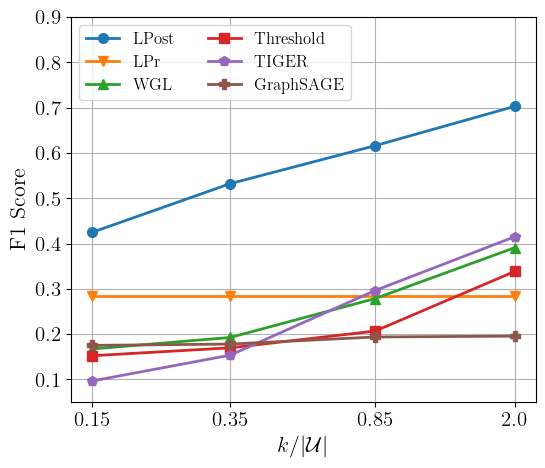

In [10]:
filename = "outputs/results_grids_0.1_True_None_10.csv"
tuneable_methods = ["langevin_posterior", "threshold", "gnn"]
fixed_methods = ["langevin_prior", "glasso", "tiger"]
train_size = 0.5
threshold_grid = {
    "langevin_posterior": np.linspace(0.45, 0.95, 5),
    "threshold": np.logspace(-1, 0, 5),
    "gnn": np.linspace(0.2, 0.8, 5),
}
metric = "f1"
col_x_axis = "obs_ratio"

np.random.seed(0)

scores_grids_10, _ = compute_estimation_performance(filename, tuneable_methods, fixed_methods, train_size, threshold_grid, metric, col_x_axis, n_splits=10)

labels = {
    "langevin_posterior": "LPost",
    "langevin_prior": "LPr",
    "glasso": "WGL",
    "threshold": "Threshold",
    "tiger": "TIGER",
    "gnn": "GraphSAGE",
}

plot_results(scores_grids_10, stds_grids=None, labels=labels,
             ylabel="F1 Score", xlabel=r"$k / |\mathcal{U}|$", logscale=True,
             ylims=(0.05, 0.9), legend_ncol=2, legend_loc="upper left",
             output_file="outputs/plots/grids_10.pdf", marker_size=7, linewidth=2)

Samples: 98


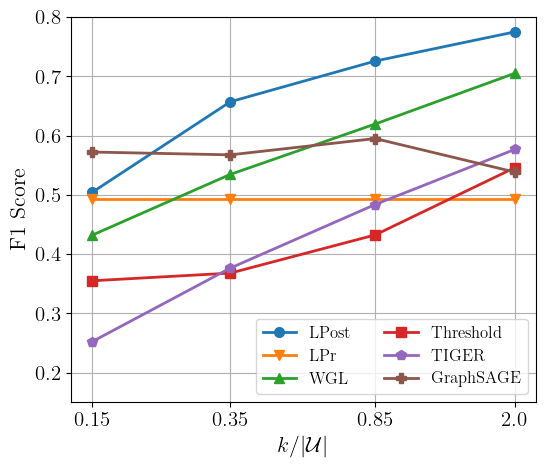

In [11]:
filename = "outputs/results_deezer_0.5_True_None_10.csv"
tuneable_methods = ["langevin_posterior", "threshold", "gnn"]
fixed_methods = ["langevin_prior", "glasso", "tiger"]
train_size = 0.5
threshold_grid = {
    "langevin_posterior": np.linspace(0.45, 0.95, 5),
    "threshold": np.logspace(-1, 0, 5),
    "gnn": np.linspace(0.2, 0.8, 5),
}
metric = "f1"
col_x_axis = "obs_ratio"

np.random.seed(0)

scores_egonets, _ = compute_estimation_performance(filename, tuneable_methods, fixed_methods, train_size, 
                                        threshold_grid, metric, col_x_axis, n_splits=10)

labels = {
    "langevin_posterior": "LPost",
    "langevin_prior": "LPr",
    "glasso": "WGL",
    "threshold": "Threshold",
    "tiger": "TIGER",
    "gnn": "GraphSAGE",
}

plot_results(scores_egonets, stds_grids=None, labels=labels,
             ylabel="F1 Score", xlabel=r"$k / |\mathcal{U}|$", logscale=True,
             ylims=(0.15, 0.8), legend_ncol=2,
             output_file="outputs/plots/egonets.pdf", marker_size=7, linewidth=2)

## Extra plots

Samples: 25


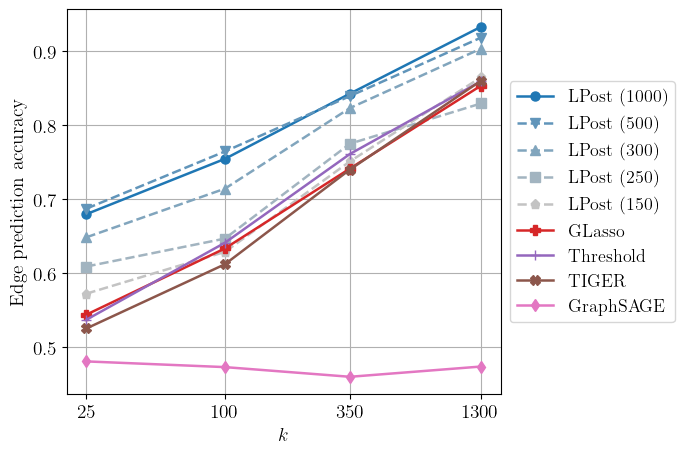

In [12]:
plt.rcParams['figure.figsize'] = [7, 5]

plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize

filename = "outputs/supplementary/results_ergm_different_dataset_sizes.csv"
tuneable_methods = ['langevin_posterior_150', 'langevin_posterior_250', 'langevin_posterior_300',
                    'langevin_posterior_500', 'langevin_posterior_1000', 'threshold', 
                    'gnn'
                    ]
fixed_methods = ["glasso", "tiger"]
train_size = 0.5
threshold_grid = {
    "langevin_posterior_150": np.linspace(0.45, 0.95, 5),
    "langevin_posterior_250": np.linspace(0.45, 0.95, 5),
    "langevin_posterior_300": np.linspace(0.45, 0.95, 5),
    "langevin_posterior_500": np.linspace(0.45, 0.95, 5),
    "langevin_posterior_1000": np.linspace(0.45, 0.95, 5),
    "threshold": np.logspace(-1, 0, 5),
    "gnn": np.linspace(0.2, 0.8, 5),
}
metric = "accuracy"
col_x_axis = "num_obs"

np.random.seed(0)

scores_ergm, _ = compute_estimation_performance(filename, tuneable_methods, fixed_methods, train_size, threshold_grid, metric, col_x_axis, n_splits=10)

num_samples_models = [150, 250, 300, 500, 1000][::-1]

labels = {f"langevin_posterior_{num_samples}": f"LPost ({num_samples})" for num_samples in num_samples_models}
labels.update({
    "glasso": "GLasso",
    "threshold": "Threshold",
    "tiger": "TIGER",
    "gnn": "GraphSAGE",
})

colors = {
    "langevin_posterior_1000": '#1f77b4',
    **{f"langevin_posterior_{num_samples}": color_fader('#1f77b4', '#c3c3c3', mix=(i+2)/(len(num_samples_models))) for i, num_samples in enumerate(num_samples_models[1:])},
    "glasso": "#d62728",
    "threshold": "#9467bd",
    "tiger": "#8c564b",
    "gnn": "#e377c2",
}

linestyles = {
    "langevin_posterior_1000": '-',
    **{f"langevin_posterior_{num_samples}": '--' for num_samples in num_samples_models[1:]},
    "glasso": "-",
    "threshold": "-",
    "tiger": "-",
    "gnn": "-",
}
plot_results(scores_ergm, stds_grids=None, labels=labels,
             title="", colors=colors, linestyles=linestyles,
             legend_ncol=1, output_file="outputs/plots/ergm_different_dataset_sizes.pdf",
             legend_out=True, marker_size=6.5, linewidth=1.8)

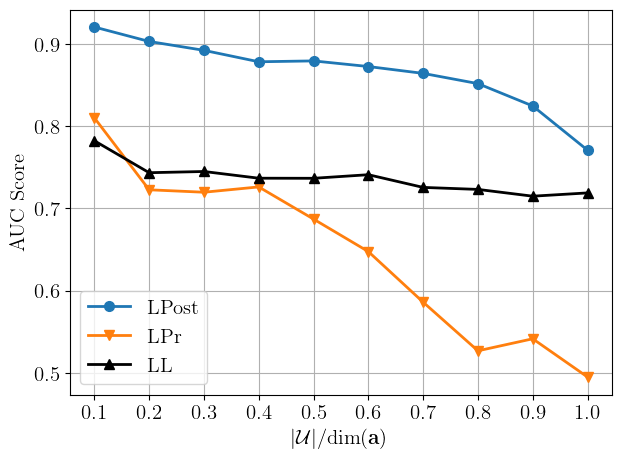

In [15]:
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize

filename = "outputs/supplementary/deezer_diff_missing.csv"

scores_diff_egonets, _ = compute_estimation_performance(filename, 
                                        tuneable_methods=[], 
                                        fixed_methods=["langevin_posterior", "langevin_prior", "langevin_mrf"],
                                        train_size=None, 
                                        threshold_grid=None, 
                                        metric="auc", 
                                        col_x_axis="nans", 
                                        n_splits=None)

labels = {
    "langevin_posterior": "LPost",
    "langevin_prior": "LPr",
    "langevin_mrf": "LL",
}

colors = {
    "langevin_posterior": '#1f77b4',
    "langevin_prior": "#ff7f0e",
    "langevin_mrf": "#000000",
}

plot_results(scores_diff_egonets, stds_grids=None, labels=labels,
             colors=colors, 
             ylabel="AUC Score",
             xlabel=r"$|\mathcal{U}| / \mathrm{dim}(\mathbf{a})$",
             logscale=False,
            #  ylims=(0.1, 0.8),
             output_file="outputs/plots/egonets_diff_missing.pdf",
             marker_size=7, linewidth=2)